# Data Science and Business Anaytics Task 1: Prediction using Supervised ML 



# The Sparks foundation : #GRIPJUNE21 

By: Kiran Chhamain

# Predict the percentage of a student based on the no. of study hours.
What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
import pandas as pd                      #importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("E:\\python\\Spark_foundations\\data_student.csv")      #importing the dataset

Data preprocessing

In [3]:
data.head()                     #first 5 observations in dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()            #last 5 observation in dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info                        #info of dataset

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [6]:
data.shape                 #shape of data

(25, 2)

In [7]:
data.describe()               #basic statistics of dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.columns                  #no. of columns present in dataset

Index(['Hours', 'Scores'], dtype='object')

In [9]:
print("Rows: ", len(data))          #length of nos.of rows

Rows:  25


In [10]:
data.nunique()                      #unique values in dataset

Hours     23
Scores    23
dtype: int64

Corelation in dataset of the scores and hours

In [11]:
corelation = data.corr()

<AxesSubplot:>

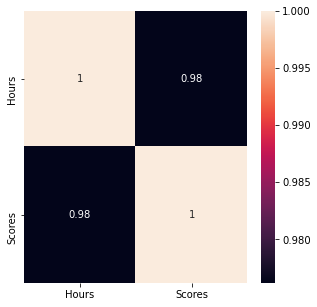

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

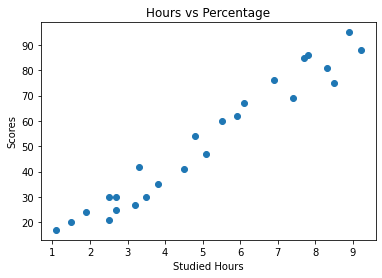

In [13]:
plt.scatter(data['Hours'], data['Scores'])                       #visualization plot of dataset
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

no.of points are following the simple regression line, hence the datasets are linearly distributed.

# Model Fitting

Train-Test Split

In [14]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Through visualization plot, we have observed that the no. of points in dataset are linearly distributed so Training the model with Simple Linear Regression model on the Training set

In [16]:
lgr = LinearRegression()
lgr.fit(X_train, y_train)

LinearRegression()

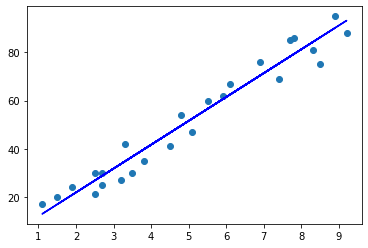

In [17]:
line = lgr.coef_*X+lgr.intercept_      # Plotting the regression line
plt.scatter(X, y)
plt.plot(X, line,color = 'blue');
plt.show()

In [18]:
y_pred = lgr.predict(X_test)                              #prediction of dataset
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [19]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})           #comparision of actual and predicted values in dataset.
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
data = np.array(9.25)                            #Predicted Score of dataset
data = data.reshape(-1, 1)
pred = lgr.predict(data)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [93.69173249].


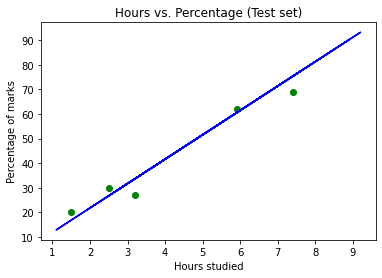

In [21]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, lgr.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))           #Error Metrics:MSE value of dataset

Mean Absolute Error: 4.183859899002975


In [23]:
print("The R-Square of the model is: ",r2_score(y_test,y_pred))                   #Error Metrics:R square value of dataset

The R-Square of the model is:  0.9454906892105356


Conclusion:

By using a Linear Regression Model to predict the score of a student, if he/she studies for 9.25 hours/day then the Predicted Score came out to be 93.69.